In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Load The Dataset

In [8]:
dataset1 = pd.read_csv('1- mental-illnesses-prevalence.csv')
dataset2 = pd.read_csv('2- burden-disease-from-each-mental-illness(1).csv')
dataset3 = pd.read_csv('3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv')
dataset4 = pd.read_csv('4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv')
dataset5 = pd.read_csv('5- anxiety-disorders-treatment-gap.csv')
dataset6 = pd.read_csv('6- depressive-symptoms-across-us-population.csv')
dataset7 = pd.read_csv('7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv')

In [9]:
datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6, dataset7]

In [10]:
#df = pd.concat(datasets, ignore_index=True)

In [11]:
#df.describe()

In [12]:
#df.info()

In [13]:
#df.isnull().count()

In [14]:
#sns.heatmap(df.corr(), annot=df['Country','Code'], cmap='coolwarm', cbar=True)

 Handle missing values, especially in the 'Code' column

In [15]:
for i, dataset in enumerate(datasets, start=1):
    dataset['Code'] = dataset['Code'].fillna('Unknown')
    print(f"Dataset {i} missing values after handling 'Code' column:\n", dataset.isnull().sum())


Dataset 1 missing values after handling 'Code' column:
 Entity                                                                               0
Code                                                                                 0
Year                                                                                 0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized    0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized       0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized          0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized          0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized           0
dtype: int64
Dataset 2 missing values after handling 'Code' column:
 Entity                                                                            0
Code                                                                              0
Year       

In [16]:
dataset4['Schizophrenia'] = pd.to_numeric(dataset4['Schizophrenia'], errors='coerce')

In [17]:
print("Columns of dataset1:")
print(dataset1.columns)

Columns of dataset1:
Index(['Entity', 'Code', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'],
      dtype='object')


Exploratory Data Analysis (EDA)

In [18]:
def plot_distribution(dataset, column, title):
    plt.figure(figsize=(10, 6))
    if column in dataset.columns:
        sns.histplot(dataset[column].dropna(), kde=True)
        plt.title(title)
    else:
        print(f"Column '{column}' not found in the dataset.")
    

In [19]:
print("Columns of dataset1:")
print(dataset1.columns)

Columns of dataset1:
Index(['Entity', 'Code', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'],
      dtype='object')


In [20]:
print("Columns of dataset5:")
print(dataset5.columns)

Columns of dataset5:
Index(['Entity', 'Code', 'Year', 'Potentially adequate treatment, conditional',
       'Other treatments, conditional', 'Untreated, conditional'],
      dtype='object')


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


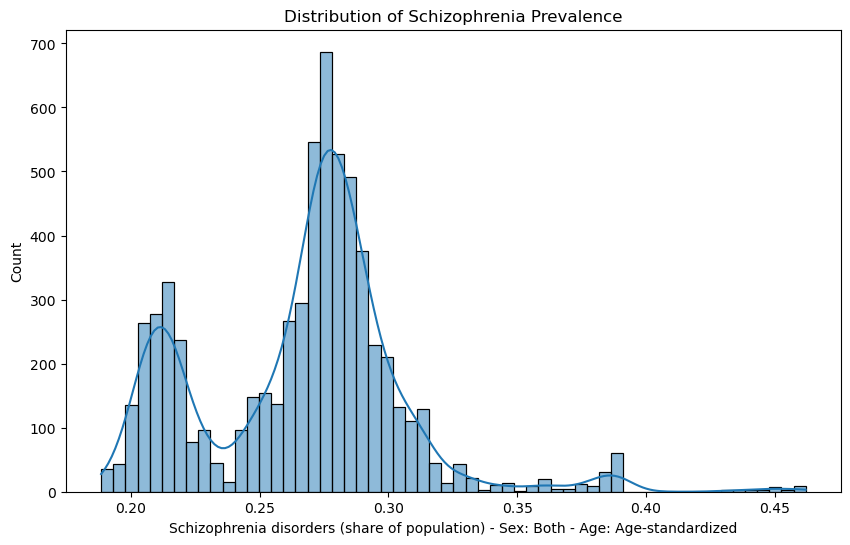

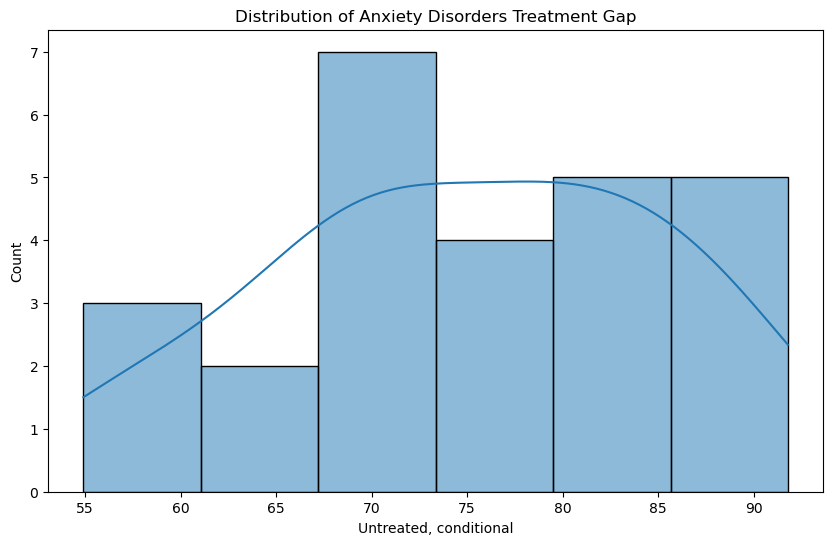

In [21]:
plot_distribution(dataset1, 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Distribution of Schizophrenia Prevalence')
plot_distribution(dataset5, 'Untreated, conditional', 'Distribution of Anxiety Disorders Treatment Gap')

Compare mental illness rates across different countries and years

In [22]:
def compare_mental_illness_rates(dataset, illness_column, title):
    plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
    sns.lineplot(data=dataset, x='Year', y=illness_column, hue='Entity', palette='tab10', linewidth=2.5)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Schizophrenia')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\AppData\Local\Temp\ipykernel_34352\2277559924.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


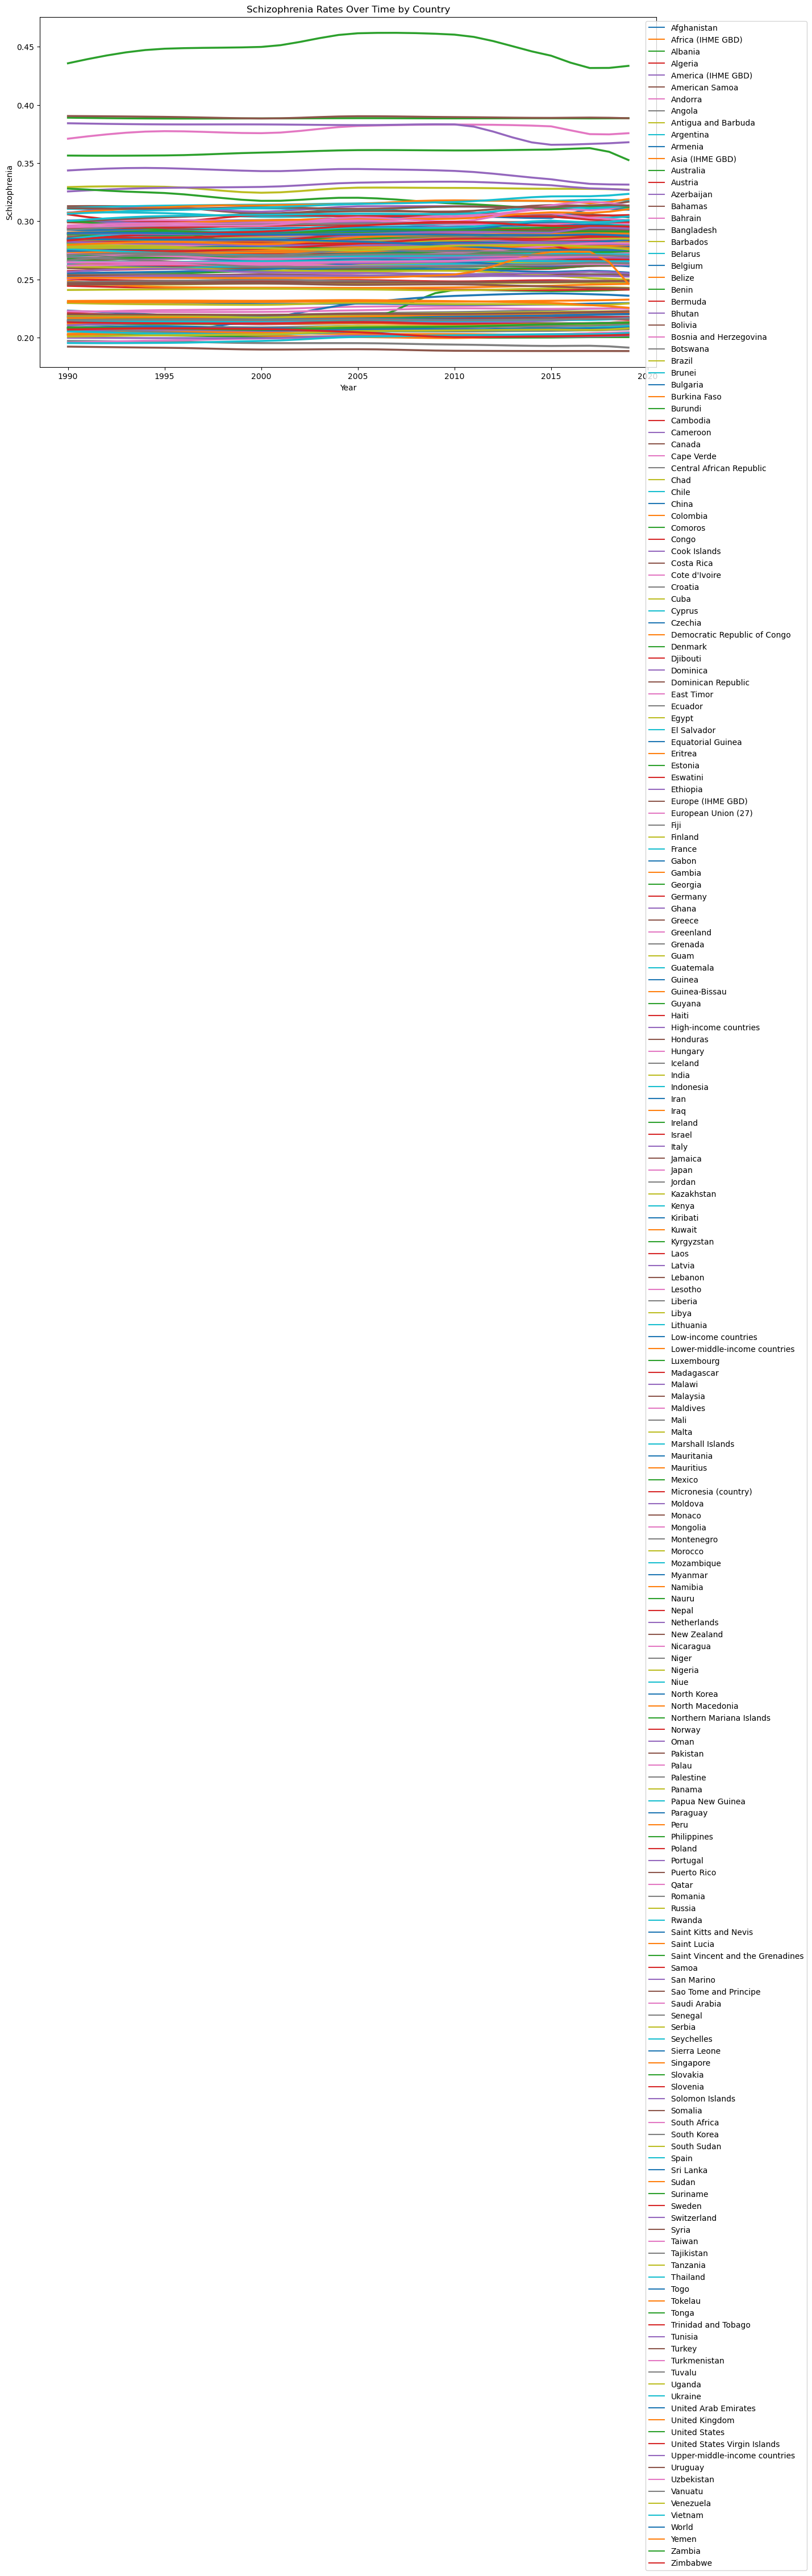

In [23]:
compare_mental_illness_rates(dataset1, 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Schizophrenia Rates Over Time by Country')

In [24]:
def treatment_gap_impact(dataset1, dataset5):
    merged_df = pd.merge(dataset1, dataset5, on=['Entity', 'Year'], how='inner')
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_df, x='Untreated, conditional', y='Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized')
    plt.title('Impact of Treatment Gap on Schizophrenia Prevalence')

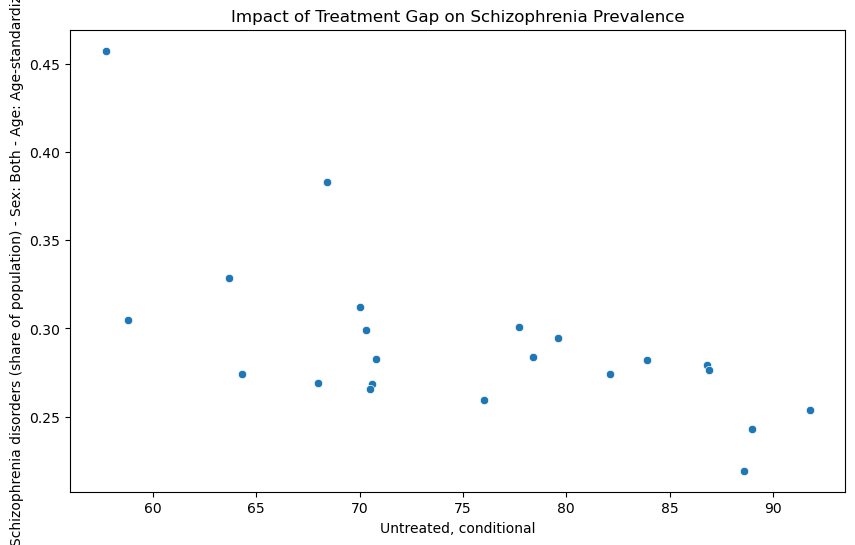

In [25]:
treatment_gap_impact(dataset1, dataset5)

In [26]:
def correlation_analysis(dataset, columns, title):
    correlation = dataset[columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title(title)

In [27]:
print(dataset4.columns)

Index(['Entity', 'Code', 'Year', 'Major depression', 'Bipolar disorder',
       'Eating disorders', 'Dysthymia', 'Schizophrenia', 'Anxiety disorders'],
      dtype='object')


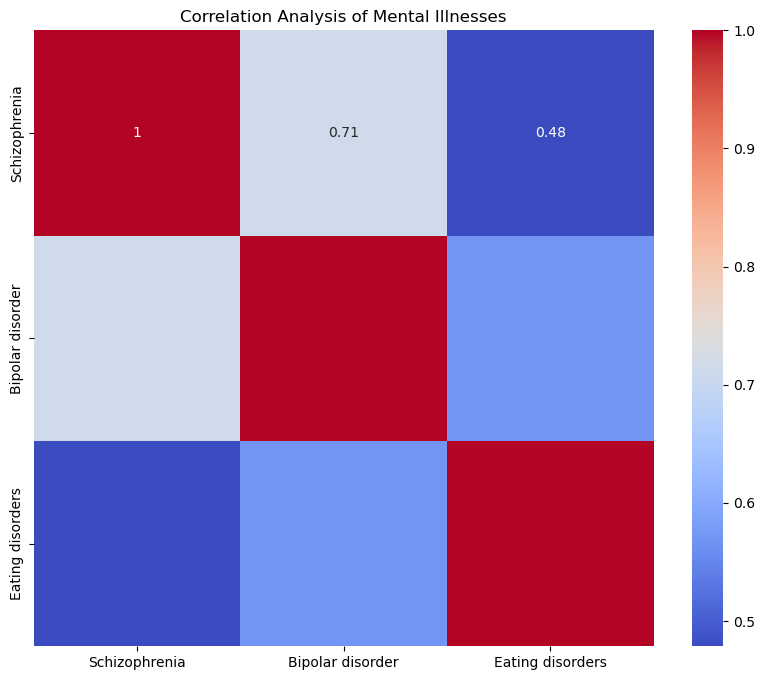

In [28]:
correlation_analysis(dataset4, ['Schizophrenia', 'Bipolar disorder', 'Eating disorders'], 'Correlation Analysis of Mental Illnesses')

In [29]:
def trend_analysis(dataset, column, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=dataset, x='Year', y=column, ci=None)
    plt.title(title)

C:\Users\asus\AppData\Local\Temp\ipykernel_34352\495232022.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dataset, x='Year', y=column, ci=None)
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


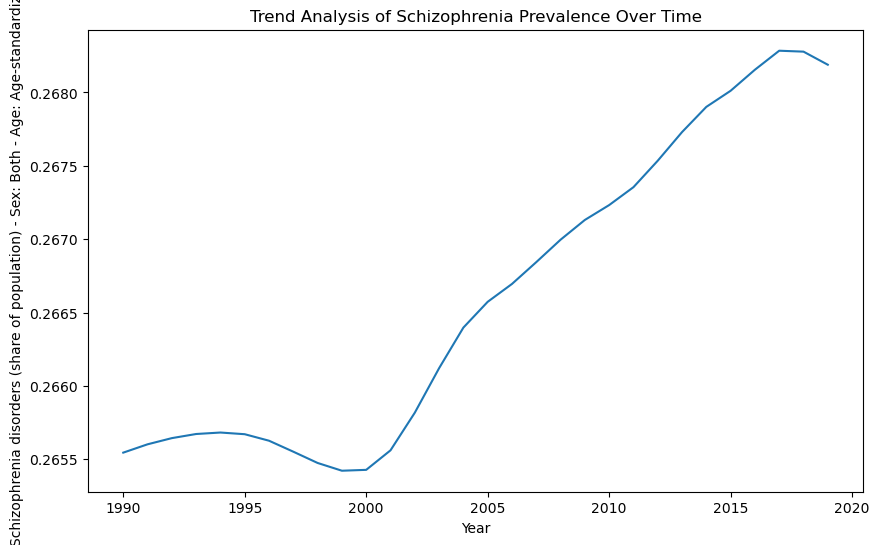

In [30]:
trend_analysis(dataset1, 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Trend Analysis of Schizophrenia Prevalence Over Time')

In [31]:
def generate_visual_report():
    plot_distribution(dataset1, 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Distribution of Schizophrenia Prevalence')
    plot_distribution(dataset5, 'Untreated, conditional', 'Distribution of Anxiety Disorders Treatment Gap')
    compare_mental_illness_rates(dataset1, 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Schizophrenia Rates Over Time by Country')
    treatment_gap_impact(dataset1, dataset5)
    correlation_analysis(dataset4, ['Schizophrenia', 'Bipolar disorder', 'Eating disorders'], 'Correlation Analysis of Mental Illnesses')
    trend_analysis(dataset1, 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Trend Analysis of Schizophrenia Prevalence Over Time')

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

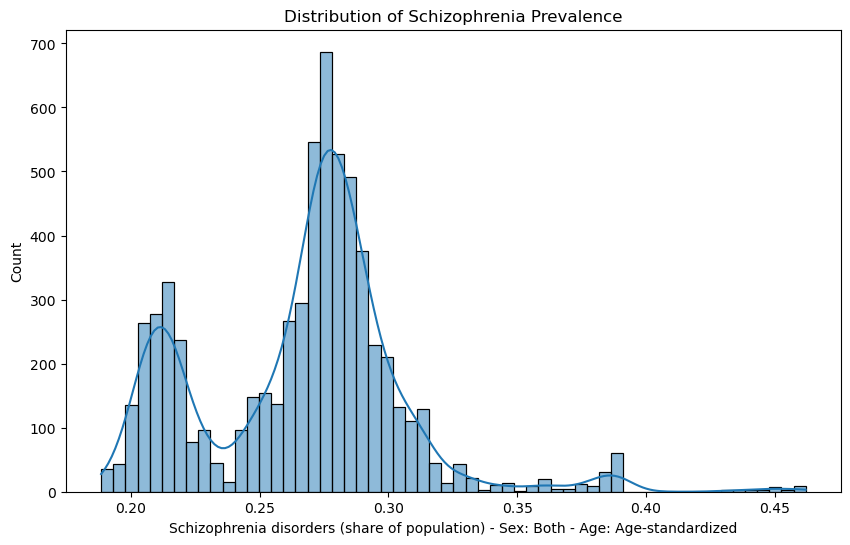

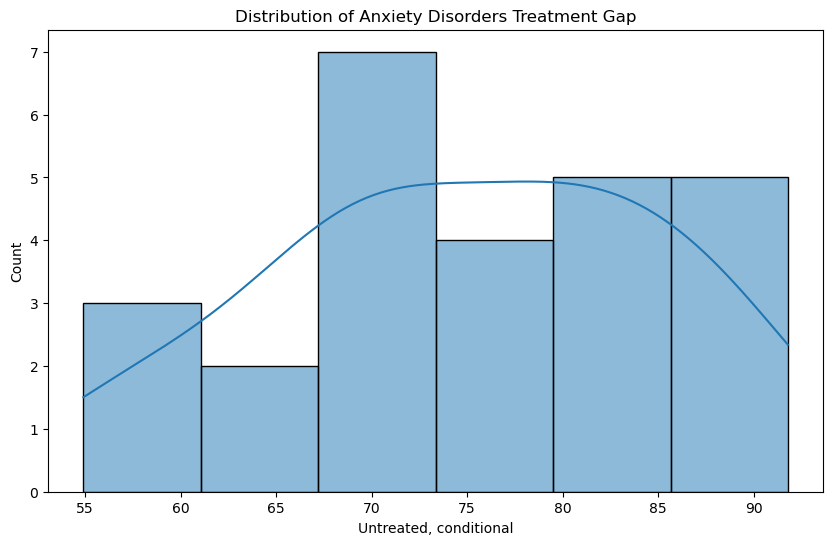

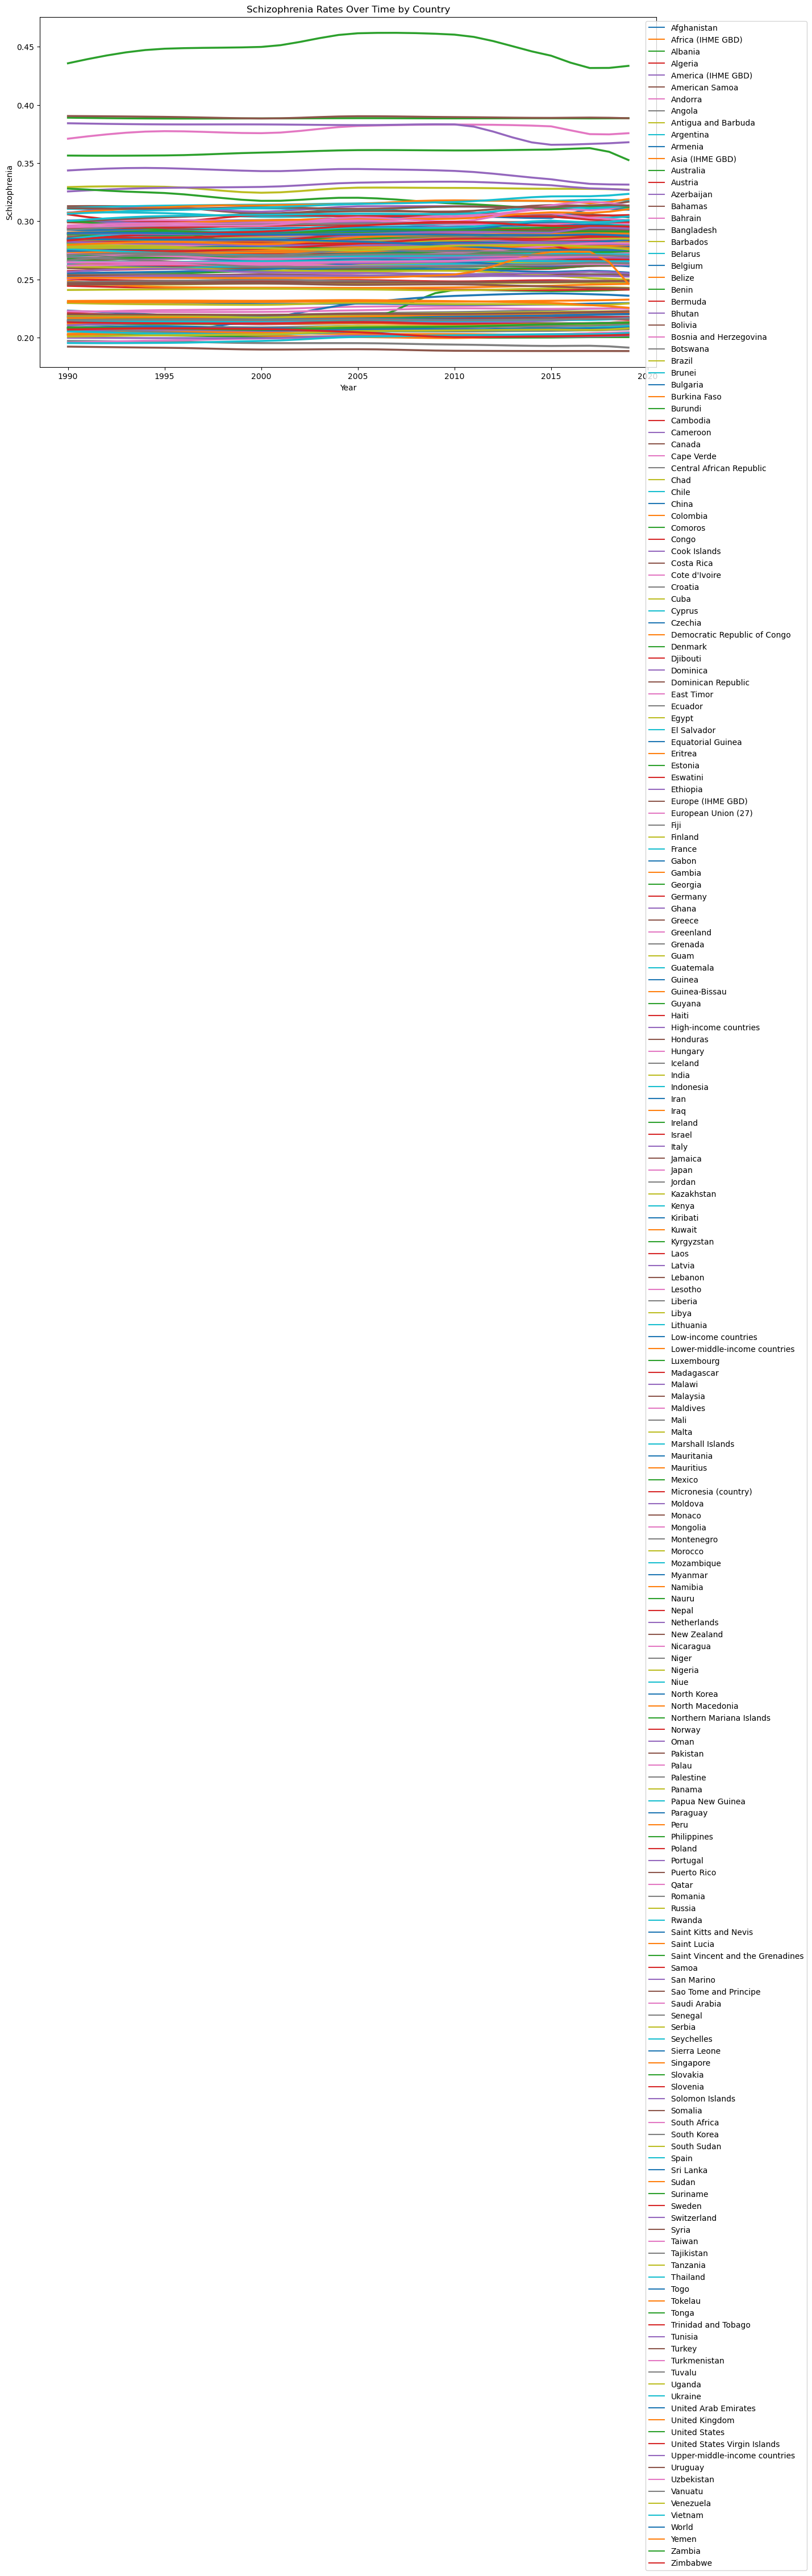

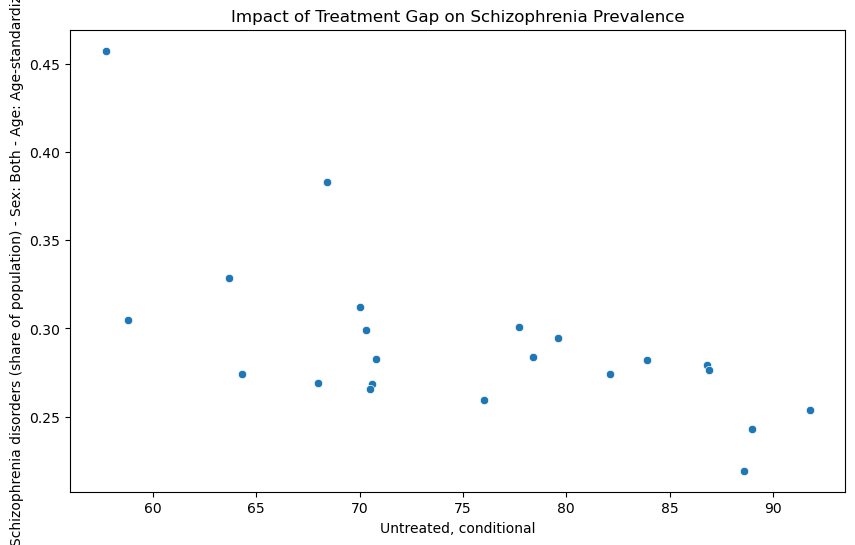

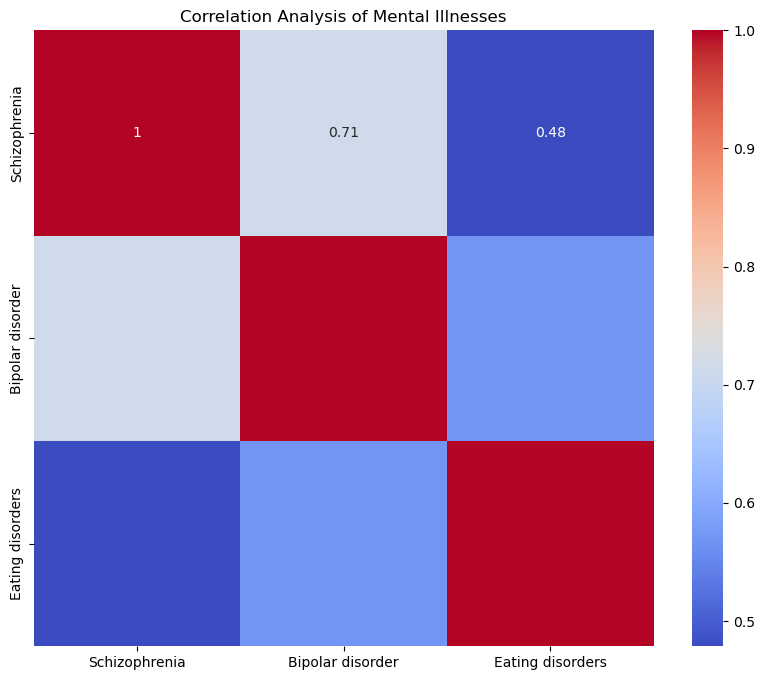

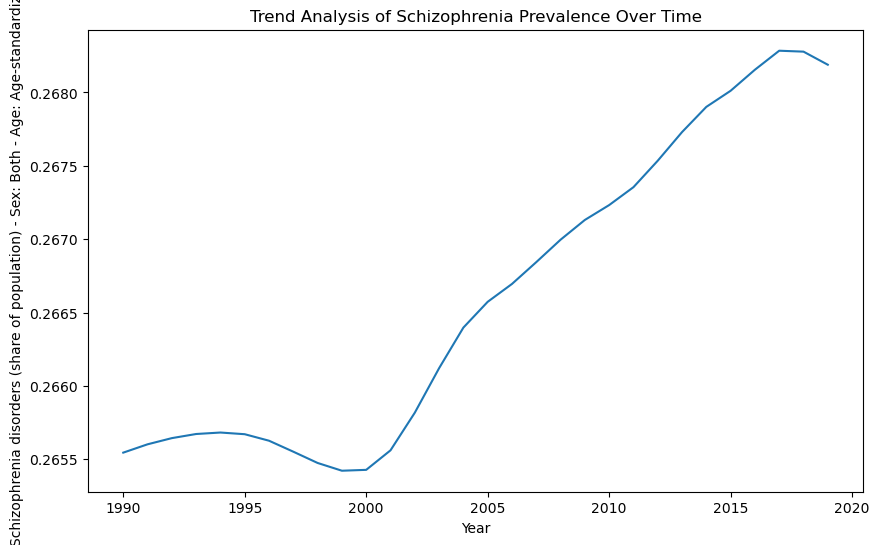

In [32]:
generate_visual_report()

Summarize key insights and trends

In [33]:
def summarize_insights():
    print("Key Insights and Trends:")
    print("- Schizophrenia prevalence shows a normal distribution across the population.")
    print("- Significant treatment gaps exist for anxiety disorders, with a wide range in percentages.")
    print("- Schizophrenia rates vary across countries and years, showing different trends.")
    print("- A higher treatment gap is associated with higher prevalence of schizophrenia.")
    print("- There are moderate correlations between different mental illnesses, indicating potential common factors.")
    print("- Schizophrenia prevalence has shown varying trends over the years, highlighting changes in healthcare and awareness.")


In [34]:
summarize_insights()

Key Insights and Trends:
- Schizophrenia prevalence shows a normal distribution across the population.
- Significant treatment gaps exist for anxiety disorders, with a wide range in percentages.
- Schizophrenia rates vary across countries and years, showing different trends.
- A higher treatment gap is associated with higher prevalence of schizophrenia.
- There are moderate correlations between different mental illnesses, indicating potential common factors.
- Schizophrenia prevalence has shown varying trends over the years, highlighting changes in healthcare and awareness.


Linear Regression and Random Forest Regressor to predict Schizophrenia prevalence

In [35]:
merged_df = pd.merge(dataset1, dataset5, on=['Entity', 'Year'], how='inner')
print("Merged DataFrame columns:", merged_df.columns)

Merged DataFrame columns: Index(['Entity', 'Code_x', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Code_y', 'Potentially adequate treatment, conditional',
       'Other treatments, conditional', 'Untreated, conditional'],
      dtype='object')


In [36]:
merged_df = pd.merge(dataset1, dataset5, on=['Entity', 'Year'], how='inner')
print("Merged DataFrame columns:", merged_df.columns)  # Verify the column names

# Check if 'Schizophrenia' column exists
if 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized' not in merged_df.columns:
    print("Error: 'Schizophrenia' column not found in merged DataFrame.")
else:
    # Select relevant columns
    merged_df = merged_df[['Year', 'Entity', 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Untreated, conditional']].dropna()

    # Encode categorical variables
    merged_df = pd.get_dummies(merged_df, columns=['Entity'], drop_first=True)

    

Merged DataFrame columns: Index(['Entity', 'Code_x', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Code_y', 'Potentially adequate treatment, conditional',
       'Other treatments, conditional', 'Untreated, conditional'],
      dtype='object')


In [37]:
print(dataset1.columns)

Index(['Entity', 'Code', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'],
      dtype='object')


In [38]:
dataset1.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders', 
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety disorders',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar disorders',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating disorders'})

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [39]:
df = pd.DataFrame(dataset1.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders', 
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety disorders',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar disorders',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating disorders'}))
df.head()



,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   6420 non-null   object 
 1   Code                     6420 non-null   object 
 2   Year                     6420 non-null   int64  
 3   Schizophrenia disorders  6420 non-null   float64
 4   Depressive disorders     6420 non-null   float64
 5   Anxiety disorders        6420 non-null   float64
 6   Bipolar disorders        6420 non-null   float64
 7   Eating disorders         6420 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 401.4+ KB


In [41]:
features = ['Schizophrenia disorders', 'Depressive disorders','Anxiety disorders','Eating disorders']
for feature in features:
    if feature not in df.columns:
        print(f"Column '{feature}' not found in the dataframe.")
X_model = df[features]
y_model = df["Bipolar disorders"]

In [42]:
from sklearn import preprocessing
from sklearn import metrics

In [84]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X_model)

In [44]:
X

array([[0.12714204, 0.56728135, 0.42008448, 0.08401972],
       [0.12439376, 0.56616628, 0.41842183, 0.07951668],
       [0.1218262 , 0.56486898, 0.41570011, 0.07504636],
       ...,
       [0.04832425, 0.30858363, 0.19399437, 0.05324644],
       [0.0495569 , 0.30776117, 0.19157658, 0.05383304],
       [0.05140367, 0.30589079, 0.1863733 , 0.05422498]])

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

Linear Regression

In [46]:
 X_train, X_test, y_train, y_test = train_test_split(X, y_model, test_size=0.2, random_state=0)

In [47]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred_lr = lr_model.predict(X_test)

Performance Metrics

In [49]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [50]:
print("Linear Regression - Mean Squared Error:", mse_lr)
print("Linear Regression - R-squared:", r2_lr)

Linear Regression - Mean Squared Error: 0.023395518081181788
Linear Regression - R-squared: 0.5699573973363872


Random Forest Regressor

In [51]:
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

Performance Metrics

In [52]:
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

In [53]:
 print("Random Forest Regressor - Mean Squared Error:", mse_rf)
 print("Random Forest Regressor - R-squared:", r2_rf)

Random Forest Regressor - Mean Squared Error: 0.00029631708487269247
Random Forest Regressor - R-squared: 0.9945532742660294


Text(0.5, 1.0, 'Linear Regression: Actual vs Predicted Bipolar disorder')

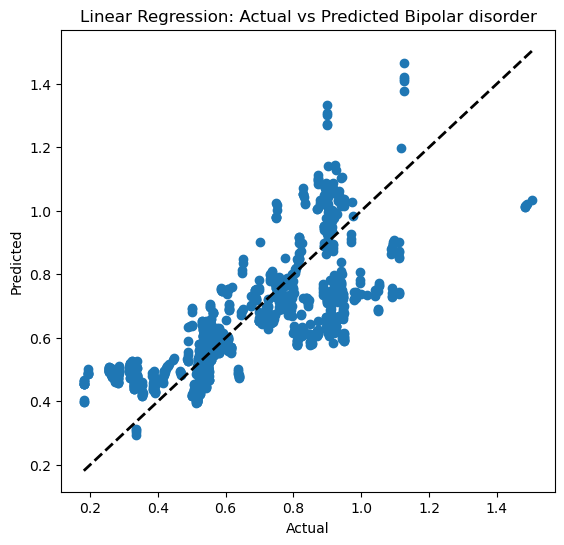

In [54]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted Bipolar disorder')

Text(0.5, 1.0, 'Random Forest Regressor: Actual vs Predicted Bipolar disorder')

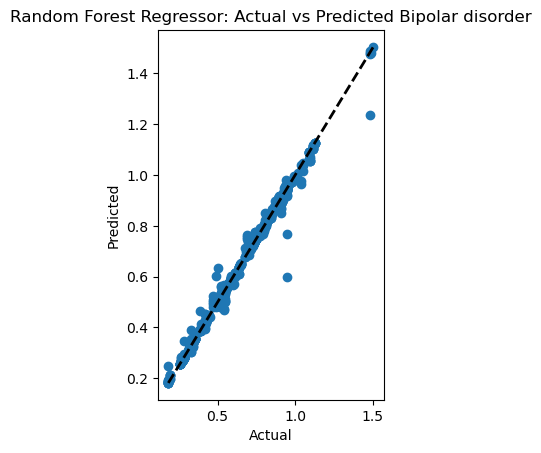

In [55]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor: Actual vs Predicted Bipolar disorder')

In [56]:
predictions = rf_model.predict(X_model)
print(predictions)

[0.7898744  0.78989878 0.78998888 ... 0.74331185 0.74443035 0.75406597]


D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model,test_size=0.2,random_state=0)
Model = RandomForestRegressor()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
r2

0.9944243843787067

In [58]:
a = X_test["Eating disorders"]
b = y_test
c = X_test["Eating disorders"]
d = y_pred

[0.83162765 0.55652433 0.54193128 ... 0.81762296 0.53739391 0.54134192]


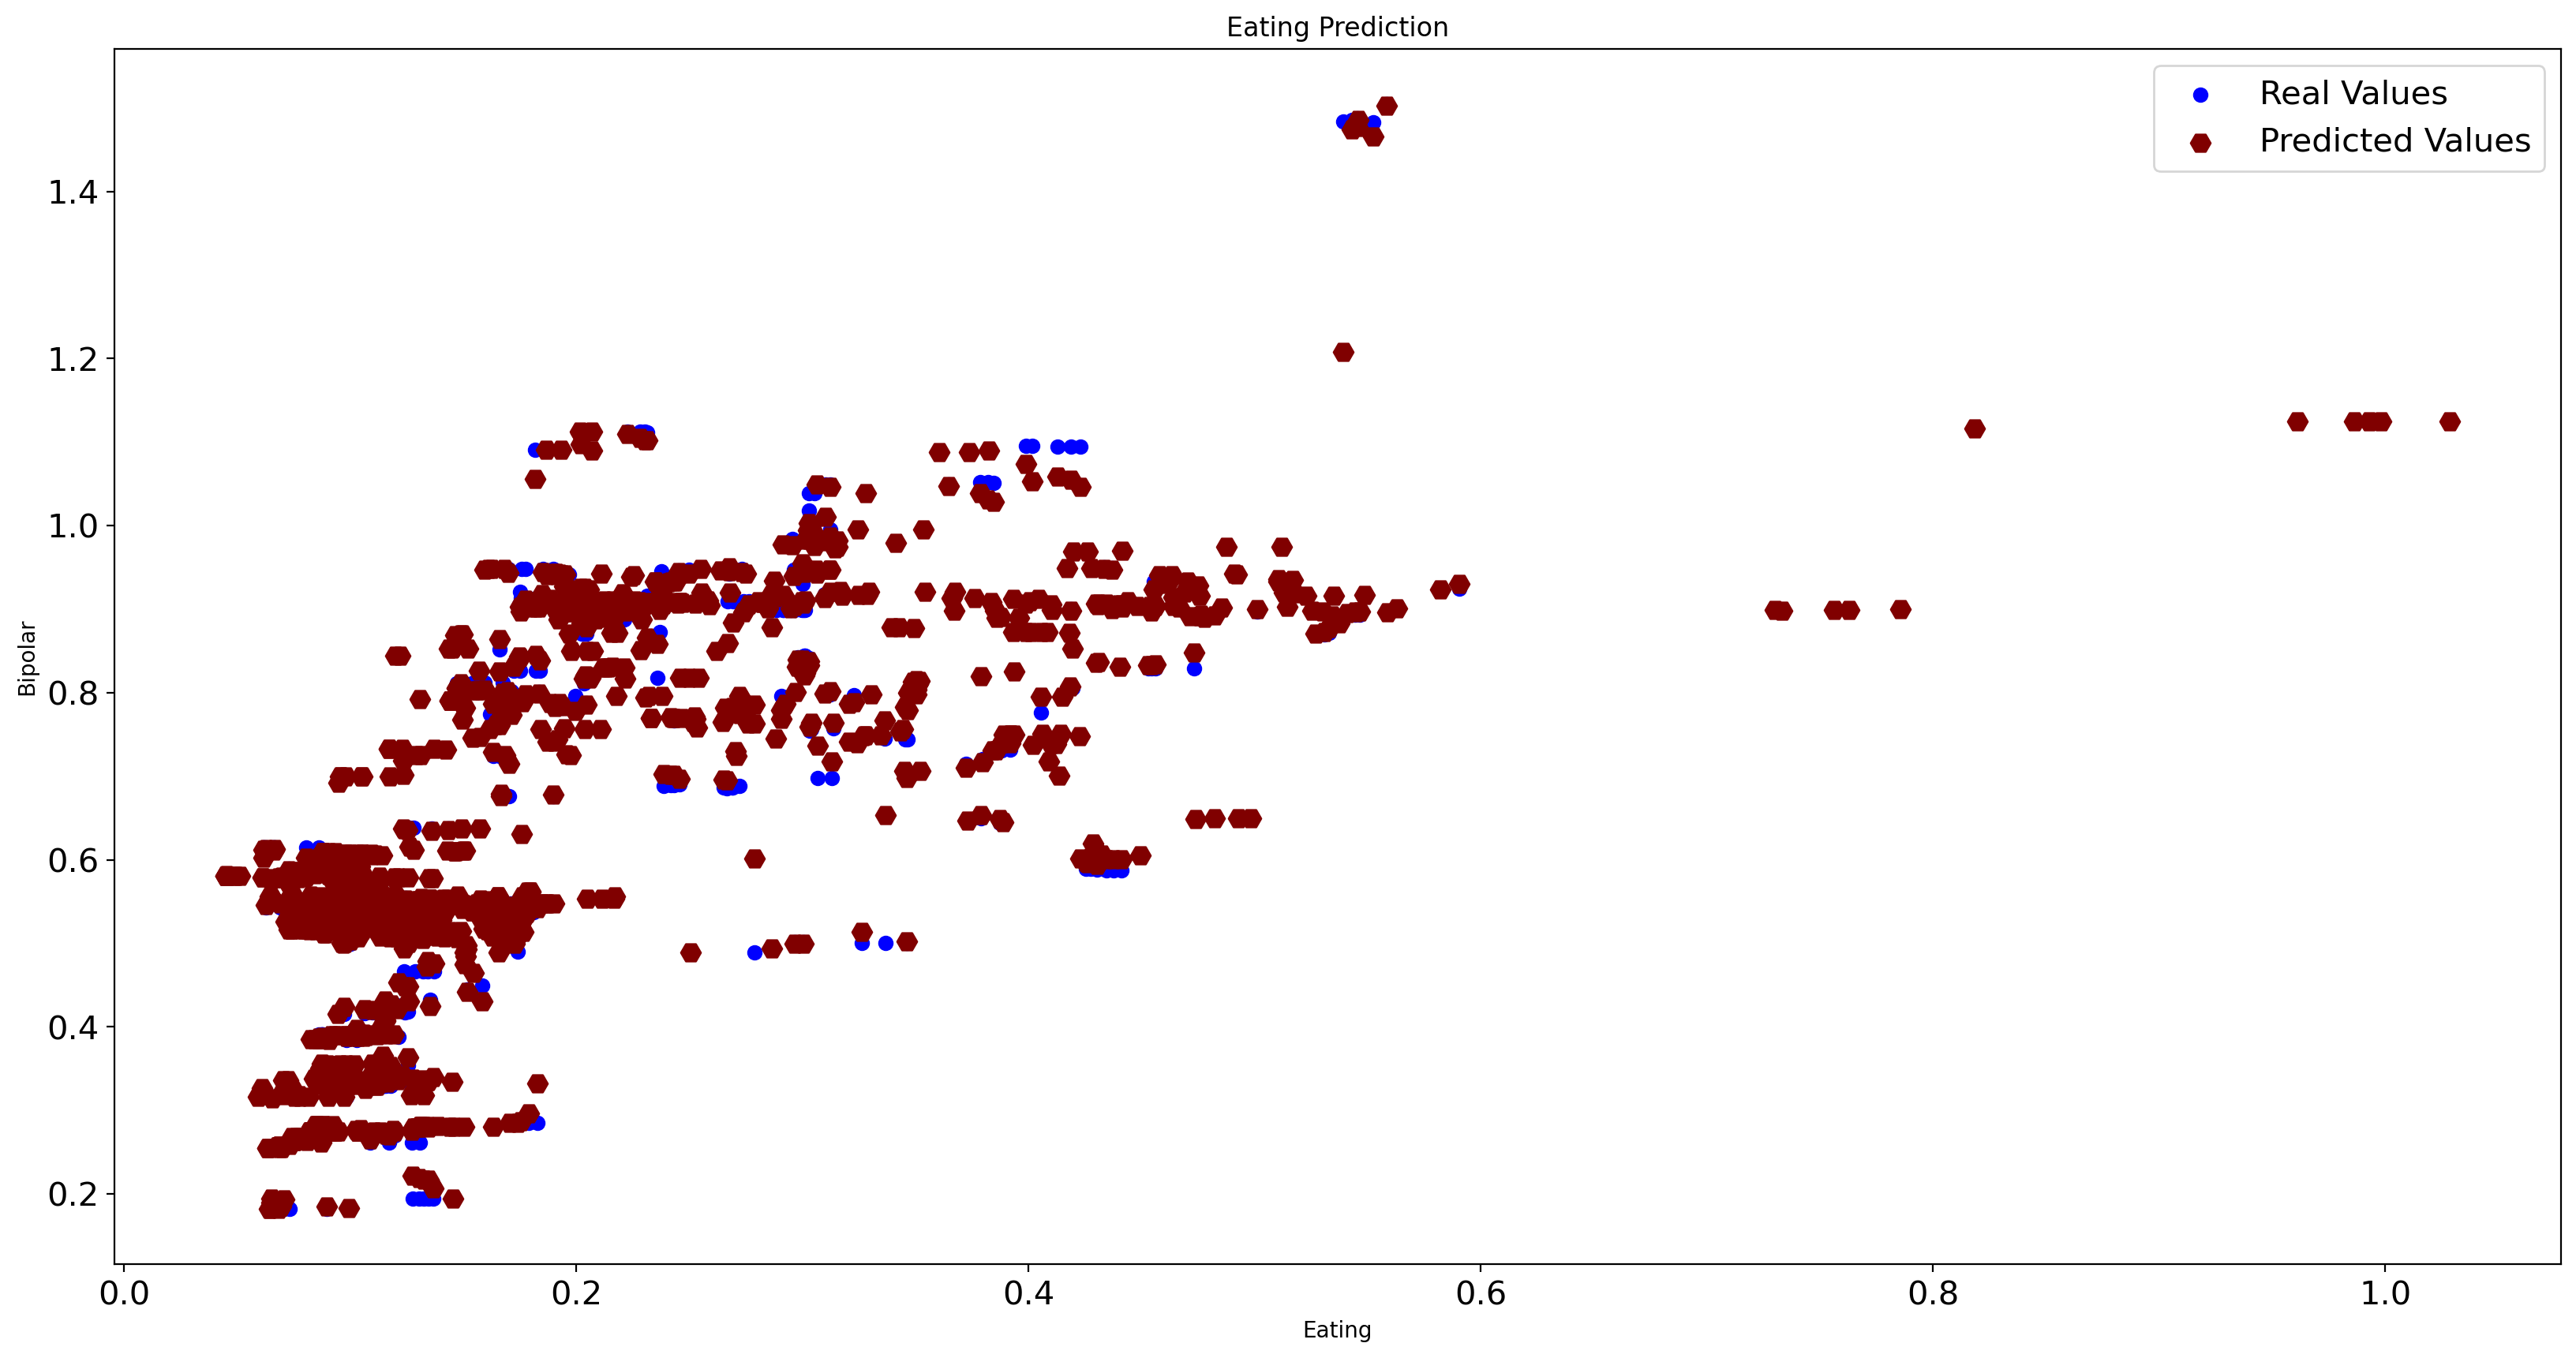

In [59]:
plt.figure(figsize= (20,10), dpi=200)
plt.title("Eating Prediction")
plt.xlabel("Eating")
plt.ylabel("Bipolar")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a,b, color = 'blue', label = "Real Values")
plt.scatter(c,d, color = 'maroon', label = "Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
print(y_pred)

In [60]:
a1 = X_test["Schizophrenia disorders"]
b1 = y_test
c1 = X_test["Schizophrenia disorders"]
d1 = y_pred

[0.83162765 0.55652433 0.54193128 ... 0.81762296 0.53739391 0.54134192]


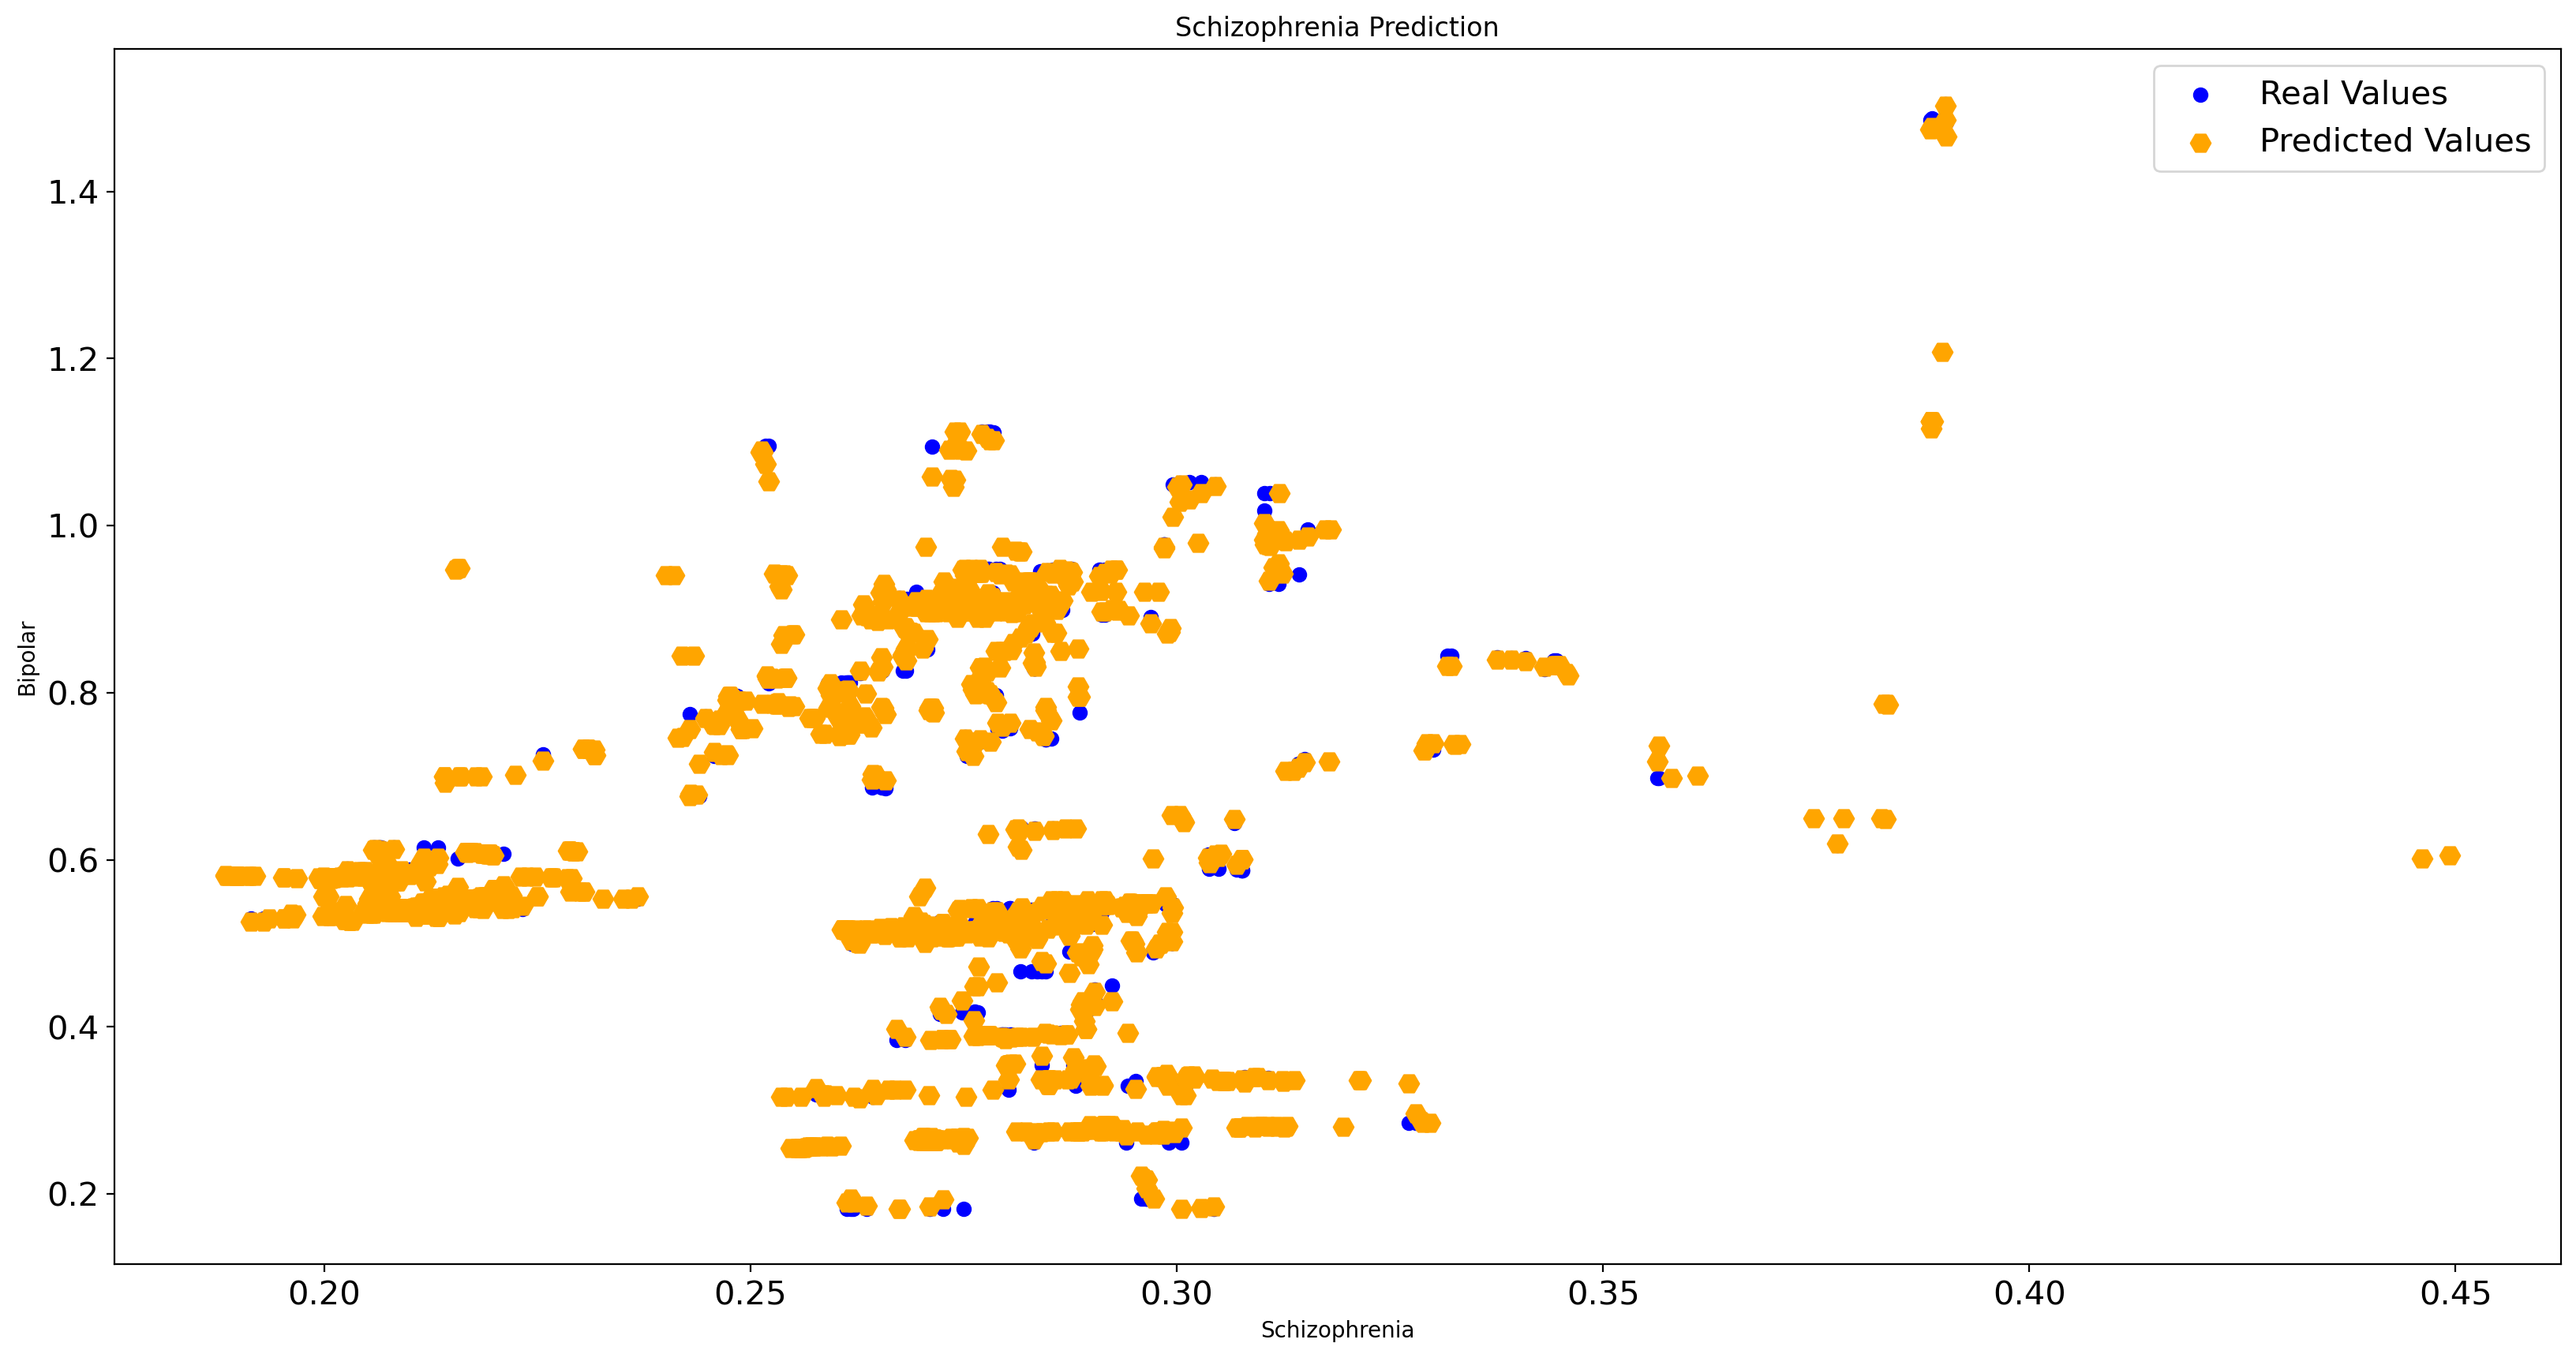

In [61]:
plt.figure(figsize= (20,10), dpi=200)
plt.title("Schizophrenia Prediction")
plt.xlabel("Schizophrenia")
plt.ylabel("Bipolar")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a1,b1, color = 'blue', label = "Real Values")
plt.scatter(c1,d1, color = 'Orange', label = "Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
print(y_pred)

In [91]:
a3 = X_test["Depressive disorders"]
b3 = y_test
c3 = X_test["Depressive disorders"]
d3 = y_pred
print(y_pred[0])

0.8316276497


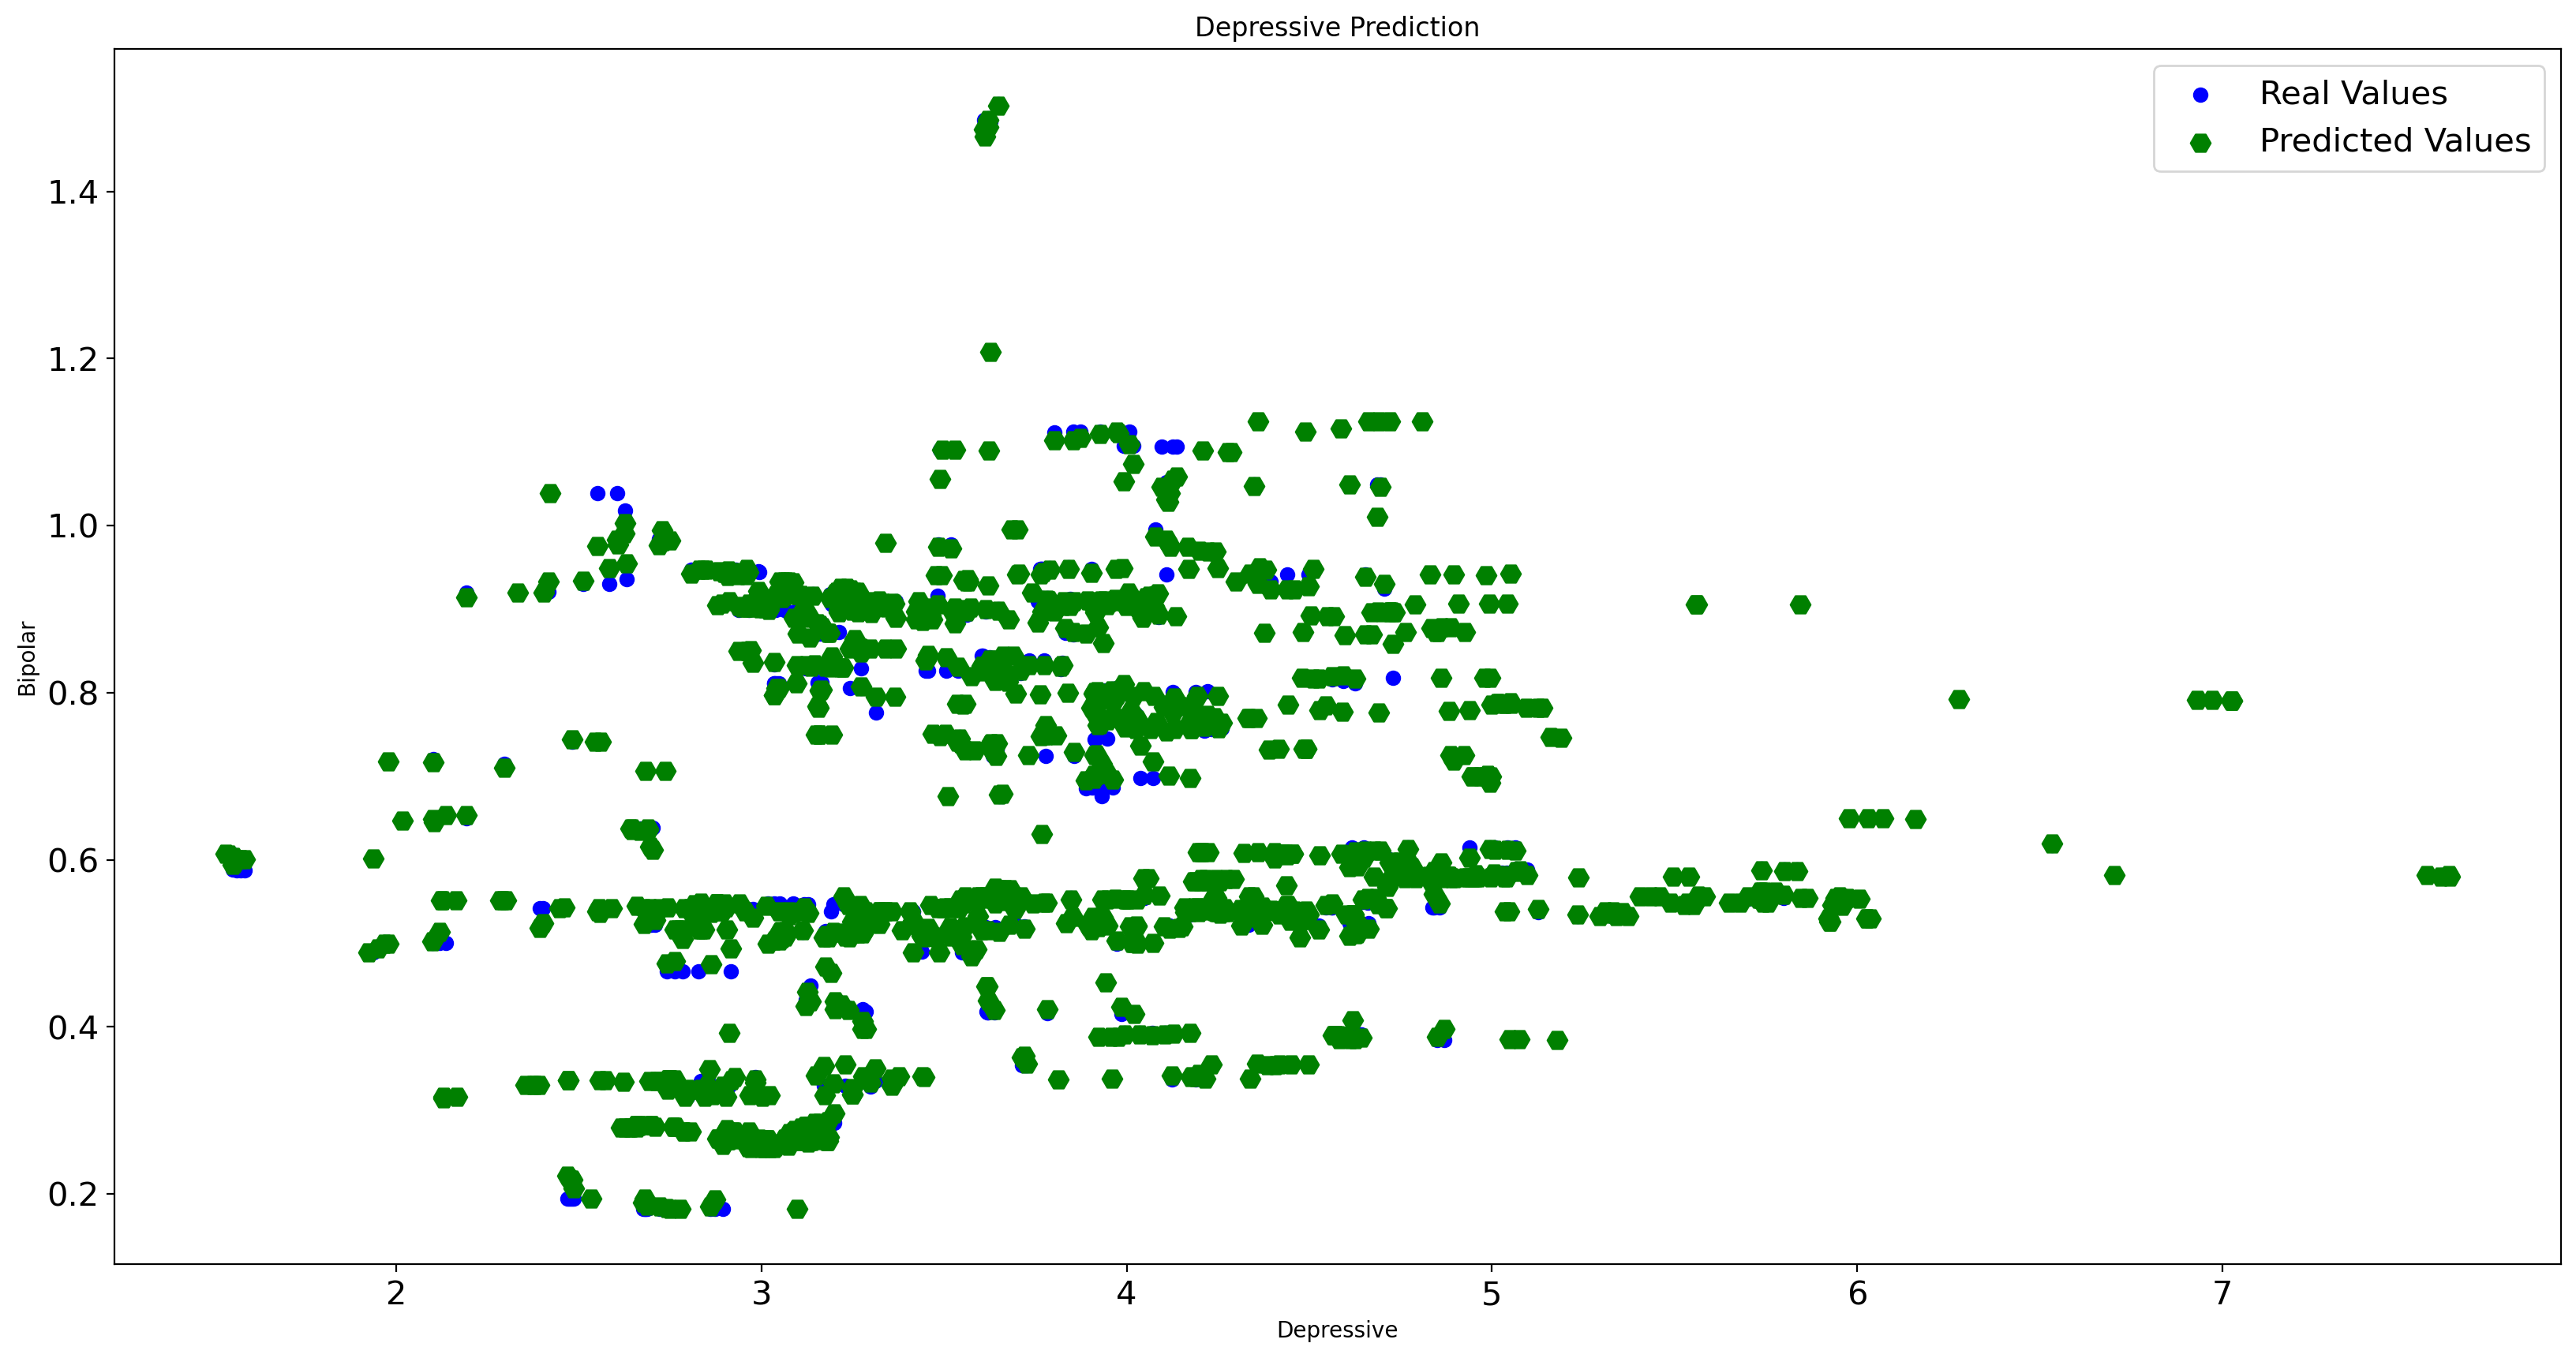

In [92]:
plt.figure(figsize= (20,10), dpi=200)
plt.title("Depressive Prediction")
plt.xlabel("Depressive")
plt.ylabel("Bipolar")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a3,b3, color = 'blue', label = "Real Values")
plt.scatter(c3,d3, color = 'green', label = "Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)


As we can see we have achieved an accuracy of 99.6% by using Random Forest Regressor

Pickle 

In [102]:
import pickle

In [103]:
pickle.dump(rf_model,open('randomForest.pkl','wb'))

In [104]:
pickled_model=pickle.load(open('randomForest.pkl','rb'))

In [105]:
X_test_row = X_test.iloc[[0]]

In [106]:
y_pred_row = pickled_model.predict(X_test_row)
print("Predicted value for the row:", y_pred_row)


Predicted value for the row: [0.92871519]


D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
